In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
X = input('請輸入平均膜厚(nm) ') #建議膜厚200nm
σ = input('請輸入膜厚標準差 ') #建議標準差2
num = input('總共膜數') #建議膜數20

請輸入平均膜厚(nm) 200
請輸入膜厚標準差 10
總共膜數100


In [55]:
# 依照給的平均膜厚及標準差隨機產生20個膜厚
num = int(num)
x = np.random.randn(num) * float(σ) + float(X)

In [56]:
# x, num: the thickness and the number of the film
x1 = np.zeros((1, int(num/2)))
x2 = np.zeros((1, int(num/2)))
# divide the films into two parts(odd layers, even layers)
for k in range(0, num):
    if k%2 == 0:
        x1[0,int(k/2)] = x[k]
    else:
        x2[0, int((k-1)/2)] = x[k]
# no, n1, n2 = the refraction index of vacuum, medium1(odd layer), and medium2(even layer)
no = 1
n1 = 1.45
n2 = 2
# e0, u0 = permeability of vacuum 
e0 = 1/(36*np.pi)*(1e-9)
u0 = 4*np.pi*(1e-9)
# Y0, Y1, Y2 = optical admittance of vacuum, medium1(odd layer), and medium2(even layer)
Y0 = np.sqrt(e0/u0)
Y1 = n1*Y0
Y2 = n2*Y0

Text(0, 0.5, '%')

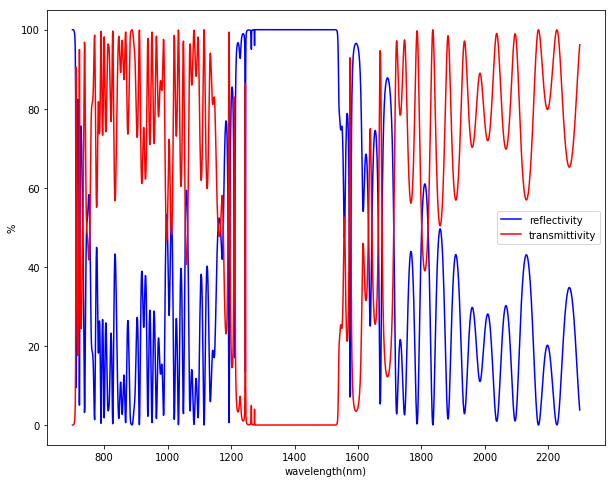

In [57]:
# lambda is from 700nm to 2300nm
R = []
T = []
X = []
plt.figure(figsize=(10, 8))
for λ in range(700, 2300, 1):
    BC = np.array([[1],[Y0]]) 
    d1 = 2*np.pi/λ*n1*x1
    d2 = 2*np.pi/λ*n2*x2
    for i in range(0, int(num/2)-1, 1):
        M1 = np.array([[np.cos(d1[0, i]), 1j*np.sin(d1[0, i])/Y1], [1j*Y1*np.sin(d1[0, i]), np.cos(d1[0, i])]])
        M2 = np.array([[np.cos(d2[0, i]), 1j*np.sin(d2[0, i])/Y2], [1j*Y2*np.sin(d2[0, i]), np.cos(d2[0, i])]])
        BC = np.dot(M1, (np.dot(M2, BC)))
    B = BC[0]
    C = BC[1]
    r = (abs(Y0*B-C)**2)/(abs(Y0*B+C)**2)*100
    R = np.append(R, r)
    t = (4*Y0*np.real(Y0))/(abs(Y0*B+C)**2)*100
    T = np.append(T, t)
    x3 = λ
    X = np.append(X, x3)


plt.plot(X, R, label = "reflectivity", color = "blue")
plt.plot(X, T, label = "transmittivity", color = "red")
plt.legend(loc = "best")
plt.xlabel("wavelength(nm)")
plt.ylabel("%")
